In [9]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from common import detect_handovers
import os

# glory to chatgpt
def get_adjacent_files(directory):
    file_list = sorted(os.listdir(directory))

    for i, current_file in enumerate(file_list):
        if i > 0:
            previous_file = file_list[i - 1]
        else:
            previous_file = None

        if i < len(file_list) - 1:
            next_file = file_list[i + 1]
        else:
            next_file = None

        yield previous_file, current_file, next_file

In [10]:
# amount of satellites we see

[]

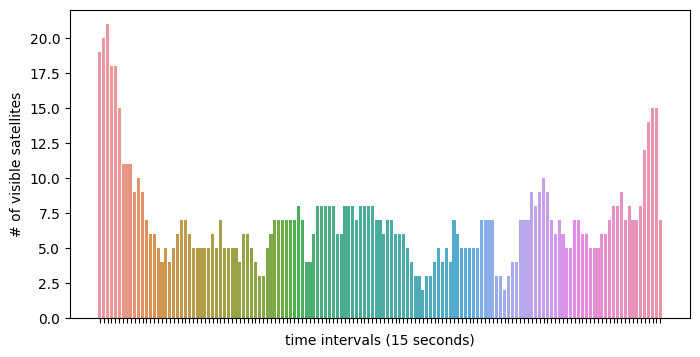

In [11]:
cnx = sqlite3.connect("../idp-castellotti-data/satellites.sqlite")
df = pd.read_sql("select * from satellites", cnx)
df = df[:1000]
df["timestamp"] = pd.to_datetime(df["ts"], unit="s")
plt.figure(figsize=(8, 4))

sns.countplot(df, x="relative_ts", dodge=False)
plt.xlabel("time intervals (15 seconds)")
plt.ylabel("# of visible satellites")
# plt.title('count of visible satellites in 15 seconds intervals')
plt.gca().axes.xaxis.set_ticklabels([])
plt.savefig("tex/tumbeamer/pics/count_visible_satellites.png")
plt.plot()

In [12]:
# correlating satellite handovers and bw

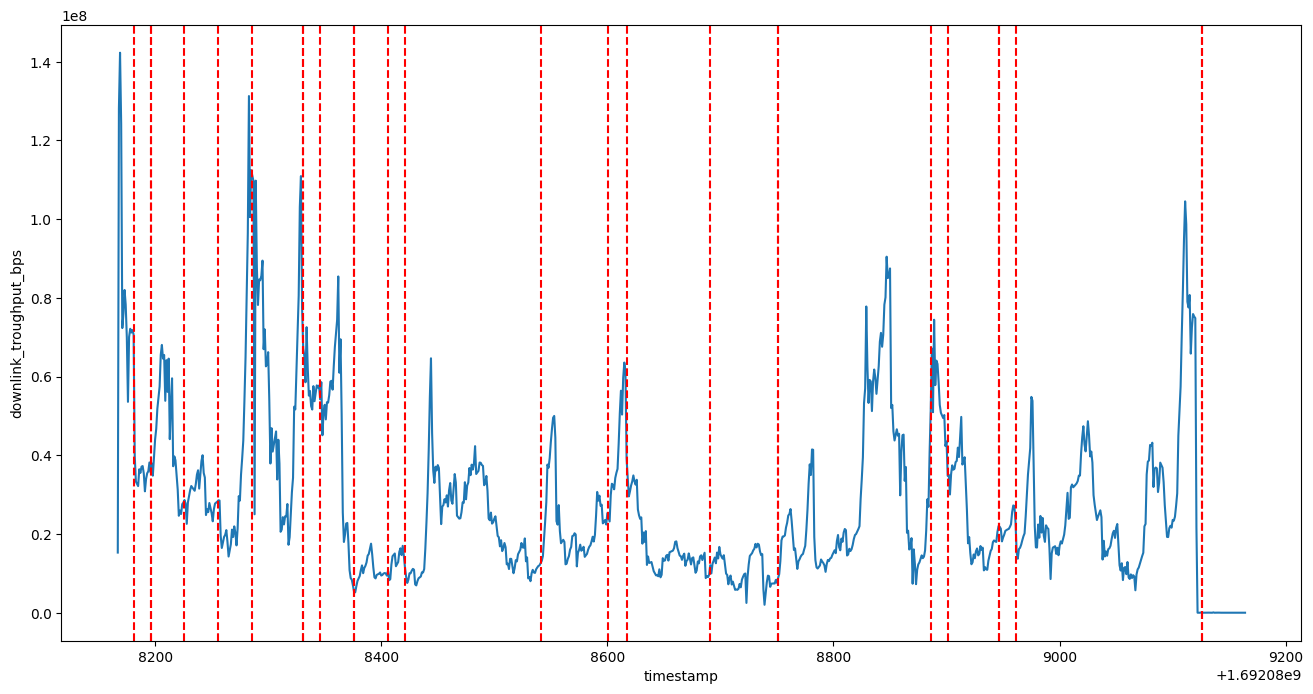

In [13]:
handover_unix_timestamps = []
directory_path = "../idp-castellotti-data/map-bw-stuff4"
for previous_file, current_file, next_file in get_adjacent_files(directory_path):
    if previous_file is not None:
        detect_handovers(
            os.path.join(directory_path, previous_file),
            os.path.join(directory_path, current_file),
            handover_unix_timestamps,
        )
    else:
        detect_handovers(
            os.path.join(directory_path, current_file),
            os.path.join(directory_path, next_file),
            handover_unix_timestamps,
        )


df = pd.read_csv("../idp-castellotti-data/map-bw-stuff4.csv")
plt.figure(figsize=(16, 8))
sns.lineplot(data=df, x="timestamp", y="downlink_troughput_bps", dashes=True)


for timestamp in handover_unix_timestamps:
    plt.axvline(x=timestamp, color="r", linestyle="--")

In [14]:
# now we want to assess whether the dish buffers packets relayed to satellites, our intuition is that if this is the case we will see a decrease in RTT if we start creating some traffic with a tool like iperf3 on the very same interface

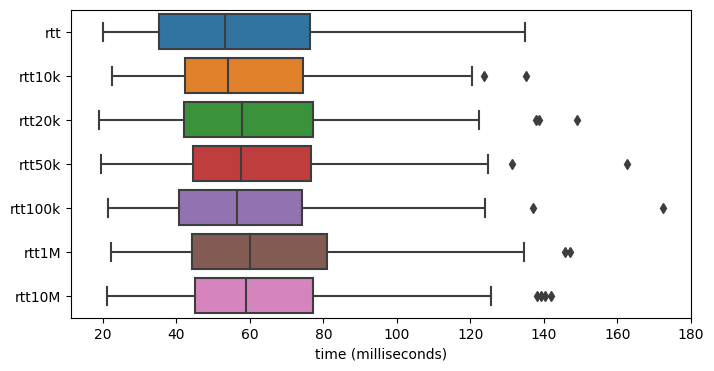

In [15]:
df0 = pd.read_csv("../idp-castellotti-data/ping-bw-normal.csv")
df1 = pd.read_csv("../idp-castellotti-data/ping-bw-10k.csv")
df2 = pd.read_csv("../idp-castellotti-data/ping-bw-20k.csv")
df3 = pd.read_csv("../idp-castellotti-data/ping-bw-50k.csv")
df4 = pd.read_csv("../idp-castellotti-data/ping-bw-100k.csv")
df5 = pd.read_csv("../idp-castellotti-data/ping-bw-1M.csv")
df6 = pd.read_csv("../idp-castellotti-data/ping-bw-10M.csv")
df = pd.concat([df0, df1, df2, df3, df4, df5, df6], axis=1).reindex(df1.index)
plt.figure(figsize=(8, 4))
sns.boxplot(
    data=df[
        [
            "rtt",
            # "pop_ping_latency_ms",
            "rtt10k",
            # "pop_ping_latency_ms10k",
            "rtt20k",
            # "pop_ping_latency_ms20k",
            "rtt50k",
            # "pop_ping_latency_ms50k",
            "rtt100k",
            # "pop_ping_latency_ms100k",
            "rtt1M",
            # "pop_ping_latency_ms1M",
            "rtt10M",
            # "pop_ping_latency_ms10M",
        ]
    ],
    orient="h",
)
# plt.savefig("tex/tumbeamer/pics/rtt-iperf-stress.png")
plt.xlabel("time (milliseconds)")
plt.show()